In [96]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
#read data
path = r"D:\SOME_THINGS\Projects\python-examples\Note_Book\Machine_Learning\datasets\test.csv"
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

<AxesSubplot:xlabel='Population', ylabel='Profit'>

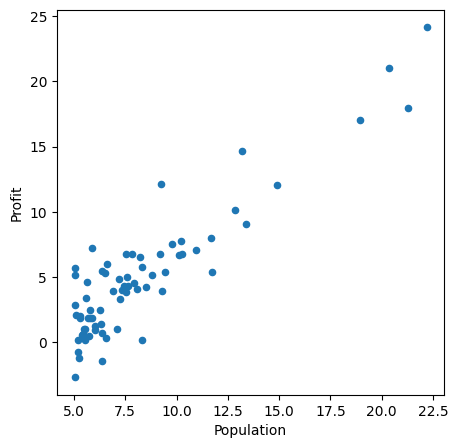

In [98]:
# #show data details
# print('data = \n' ,data.head(10) )
# print('**************************************')
# print('data.describe = \n',data.describe())
# print('**************************************')
#draw data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5))

In [99]:
# adding a new column called ones before the data
data.insert(0, 'Ones', 1)
print(data.head(5))

   Ones  Population   Profit
0     1     10.9570   7.0467
1     1     13.1760  14.6920
2     1     22.2030  24.1470
3     1      5.2524  -1.2200
4     1      6.5894   5.9966


In [103]:
# separate X (training data) from y (target variable)
cols = data.shape[1]
X = data[['Ones','Population']]  # iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [104]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

# print('X \n',X)
# print('X.shape = ' , X.shape)
# print('theta \n',theta)
# print('theta.shape = ' , theta.shape)
# print('y \n',y)
# print('y.shape = ' , y.shape)

In [105]:
# cost function
def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
    summation=np.sum( np.power( ( (X * theta.T) - y ), 2 ) )
    m=len(X)
    return summation / (2 * m)

print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))

computeCost(X, y, theta) =  24.73871783029357


In [106]:
# GD function
def gradientDescent(X, y, theta, alpha, iters):
    New_Theta   = np.matrix(np.zeros(theta.shape))
    parameters  = int(theta.ravel().shape[1])
    costs       = np.zeros(iters)
    m           = len(X)
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            New_Theta[0,j] = theta[0,j] - ((alpha / m) * np.sum(term))
            
        theta    = New_Theta
        costs[i] = computeCost(X, y, theta)
        
    return theta, costs


In [107]:
# initialize variables for learning rate and iterations
alpha = 0.001
iters = 2000

# perform gradient descent to "fit" the model parameters
New_theta, costs = gradientDescent(X, y, theta, alpha, iters)

print('NEW THETA = ' , New_theta) # final theta

print('Final Cost = ' , computeCost(X, y, New_theta)) # final cost 


NEW THETA =  [[-1.37075559  0.84055919]]
Final Cost =  3.2723135191808543


In [120]:
# get best fit line
feature= np.linspace(data.Population.min(), data.Population.max(), num=70)
Points_Best_Fit_line = ( (New_theta[0, 0]) + (New_theta[0, 1] * feature) )#teta0+theta1*x

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

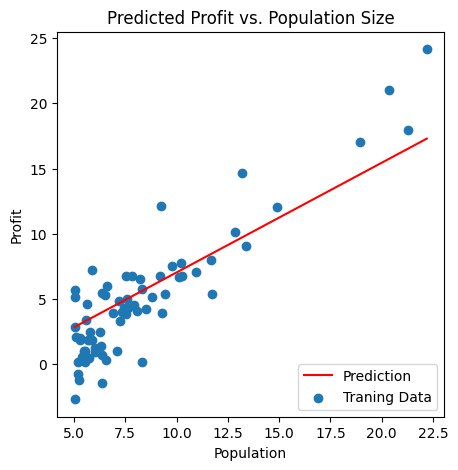

In [122]:
# draw the line

fig, shape = plt.subplots(figsize=(5,5))
shape.plot(feature, Points_Best_Fit_line, 'r', label='Prediction')
shape.scatter(x= data.Population,y= data.Profit, label='Traning Data')
shape.legend(loc=4)#place of descipetion of prdect and train data
##describ the shape
shape.set_xlabel('Population')
shape.set_ylabel('Profit')
shape.set_title('Predicted Profit vs. Population Size')

# fig, ax = plt.subplots(figsize=(5,5))
# ax.plot(x, Points_Best_Fit_line, 'r', label='Prediction')
# ax.scatter(data.Population, data.Profit, label='Traning Data')
# ax.legend(loc=4)
# ax.set_xlabel('Population')
# ax.set_ylabel('Profit')
# ax.set_title('Predicted Profit vs. Population Size')


Text(0.5, 1.0, 'Error vs. Training Epoch')

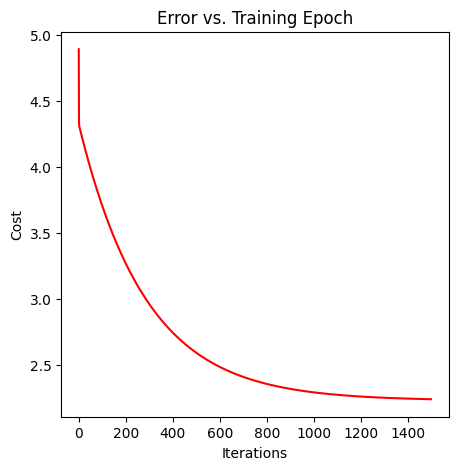

In [46]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), costs, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')


[ 0.00000000e+00  2.47978450e-04  9.91913647e-04  2.23180422e-03
  3.96764483e-03  6.19942160e-03  8.92710571e-03  1.21506452e-02
  1.58699547e-02  2.00849040e-02  2.47953038e-02  3.00008905e-02
  3.57013087e-02  4.18960922e-02  4.85846426e-02  5.57662070e-02
  6.34398531e-02  7.16044428e-02  8.02586043e-02  8.94007020e-02
  9.90288048e-02  1.09140653e-01  1.19733623e-01  1.30804691e-01
  1.42350395e-01  1.54366793e-01  1.66849426e-01  1.79793269e-01
  1.93192694e-01  2.07041417e-01  2.21332460e-01  2.36058096e-01
  2.51209802e-01  2.66778213e-01  2.82753066e-01  2.99123156e-01
  3.15876276e-01  3.32999173e-01  3.50477492e-01  3.68295725e-01
  3.86437161e-01  4.04883831e-01  4.23616464e-01  4.42614432e-01
  4.61855707e-01  4.81316812e-01  5.00972776e-01  5.20797095e-01
  5.40761692e-01  5.60836876e-01  5.80991317e-01  6.01192010e-01
  6.21404252e-01  6.41591624e-01  6.61715972e-01  6.81737399e-01
  7.01614262e-01  7.21303172e-01  7.40759006e-01  7.59934925e-01
  7.78782395e-01  7.97251

AttributeError: 'Line2D' object has no property 'lable'

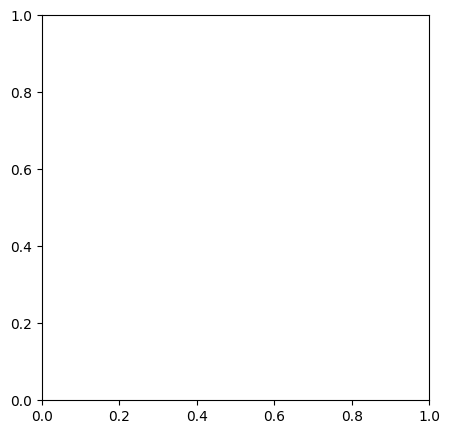

In [71]:
# Create just a figure and only one subplot
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
print(y )
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, y,'r' ,lable='simple')
ax.set_title('Simple plot')